## Load dependences and setting output configuration

In [2]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load labels from npy files

In [3]:
datapath = "F:/1_GTCG/data/INV_DUPL_4October2018/Chr17_DUP/"

germline_1_datapath = datapath + 'G1/ChannelData/'
ger_1_labels_datapath = datapath + 'G1/LabelData/'
G1_data = np.empty([0, 35, 200])
G1_labels =[]

for i in range(17,18):
        G1_data_new =np.load(germline_1_datapath +  str(i) +'_channel_maker_train_germline.npy')
        G1_labels_new = np.load(ger_1_labels_datapath  + 'G1_' + str(i) +'_label.npy') 
        print(str(i) + ':' + str(G1_data_new.shape))
        print(G1_data_new[0])
        G1_data = np.concatenate((G1_data, G1_data_new))
        G1_labels = np.concatenate((G1_labels, G1_labels_new))

17:(9692, 35, 200)
[[ 54.  49.  49. ...,  83.  85.  84.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,   0.   0.   0.]
 [ 60.  60.  60. ...,  40.  40.   0.]
 [  1.   1.   1. ...,   1.   1.   1.]]


In [5]:
datapath = "F:/1_GTCG/data/INV_DUPL_4October2018/Chr17_INV/"

germline_1_datapath = datapath + 'G1/ChannelData/'
ger_1_labels_datapath = datapath + 'G1/LabelData/'


for i in range(17,18):
        G1_data_new =np.load(germline_1_datapath +  str(i) +'_channel_maker_train_germline.npy')
        G1_labels_new = np.load(ger_1_labels_datapath  + 'G1_' + str(i) +'_label.npy') 
        print(str(i) + ':' + str(G1_data_new.shape))
        print(G1_data_new[0])
        G1_data = np.concatenate((G1_data, G1_data_new))
        G1_labels = np.concatenate((G1_labels, G1_labels_new))

17:(38910, 35, 200)
[[ 37.  38.  36. ...,  55.  56.  54.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,   0.   0.   0.]
 [ 20.  20.  20. ...,  60.  60.  60.]
 [  1.   1.   1. ...,   1.   1.   1.]]


In [6]:
G1_data_new.shape

(38910, 35, 200)

In [7]:
np.empty([0, 27, 50])

array([], shape=(0, 27, 50), dtype=float64)

In [8]:
G1_labels_new.shape

(38910,)

In [9]:
G1_labels[0]

'DUP_start'

In [10]:
G1_data.shape

(48602, 35, 200)

In [11]:
G1_labels.shape

(48602,)

In [12]:
G1_data_new.shape

(38910, 35, 200)

In [13]:
G1_labels_new.shape

(38910,)

In [247]:
#G2_labels.shape

In [248]:
#G2_labels.shape

In [14]:
datapath = "F:/1_GTCG/data/INV_DUPL_4October2018/Chr17_DUP/" 
nosv_1_datapath = datapath + 'N1/ChannelData/'
nosv_1_labels_datapath = datapath + 'N1/LabelData/'
N1_data= np.empty([0, 35,200])
N1_labels =[]

for i in range(17,18):
        N1_data_new =np.load(nosv_1_datapath +  str(i) +'_channel_maker_real_germline.npy')
        N1_labels_new = np.load(nosv_1_labels_datapath +  'N1_' + str(i) +'_label.npy') 
        print(str(i) + ':' + str(N1_data_new.shape))
        N1_data= np.concatenate((N1_data, N1_data_new))
        N1_labels = np.concatenate((N1_labels, N1_labels_new))

17:(19960, 35, 200)


In [15]:
N1_data.shape

(19960, 35, 200)

In [16]:
N1_labels.shape

(19960,)

### Find  the indexes that split the categories

In [17]:
def find_splitting_indices(labels):
    for i in range (0, labels.shape[0] - 1):
        if (labels[i] != labels[i+1]):
            print(i , ': ', labels[i] , labels[i+1] )        

In [18]:
find_splitting_indices(G1_labels)

4846 :  DUP_start DUP_end
9691 :  DUP_end INV_start
29138 :  INV_start INV_end


In [19]:
find_splitting_indices(N1_labels)

In [255]:
split = 4846

## Split into training, validation and test labelssets

In [20]:

N1_train = 2000
n_val = 1000

Repeat the same for the somatic

Concatenate the previous germline and somatic labelssets.

In [21]:
X_train = np.concatenate(( G1_data[0:2000], G1_data[4846:6846],G1_data[9691:11691],G1_data[29138:31138], N1_data[0:N1_train]), axis = 0)
X_val = np.concatenate(( G1_data[2000:3000],G1_data[6846:7846], G1_data[11691:12691],G1_data[31138:32138],  N1_data[N1_train:N1_train+n_val]), axis = 0)
X_test = np.concatenate((G1_data[3000: 4846], G1_data[7846:9692], G1_data[12691:12691+1846],G1_data[32138:32138+1846],N1_data[N1_train+n_val:N1_train+n_val+1846]), axis = 0)

In [22]:
G1_data = []
G2_data = []
N1_data = []
N2_data = [] 

In [23]:
y_train = np.concatenate(( G1_labels[0:2000], G1_labels[4846:6846],G1_labels[9691:11691],G1_labels[29138:31138], N1_labels[0:N1_train]), axis = 0)
y_val = np.concatenate(( G1_labels[2000:3000],G1_labels[6846:7846], G1_labels[11691:12691],G1_labels[31138:32138],  N1_labels[N1_train:N1_train+n_val]), axis = 0)
y_test = np.concatenate((G1_labels[3000: 4846], G1_labels[7846:9692], G1_labels[12691:12691+1846],G1_labels[32138:32138+1846],N1_labels[N1_train+n_val:N1_train+n_val+1846]), axis = 0)

In [24]:
G1_labels = []
G2_labels = []
N1_labels = []
N2_labels = [] 

### Number of training, validation and test windows

In [25]:
X_train.shape

(10000, 35, 200)

In [26]:
X_val.shape

(5000, 35, 200)

In [27]:
X_test.shape

(9230, 35, 200)

In [28]:
y_test.shape

(9230,)

In [29]:
number_channels = X_train.shape[1]
number_channels

35

## Normalize labels using the reads coverage as parameter

In [30]:
coverage = np.median(X_train[:, 0, :]) #the median of the coverage in the normal cells
coverage


47.0

In [31]:
expected_distance = 150
ones = np.ones(X_train.shape[2])*expected_distance*coverage

In [33]:
def normalize(X):       
    for i in range (0, len(X)):                              
        for j in range(0,number_channels):                                                                                            
            X[i][j] = np.divide(X[i][j], coverage)*100 
normalize(X_train)
normalize(X_val)
normalize(X_test)


In [34]:
def eliminate_noise_chanels(X):
    #return np.delete(X, [8-1,9-1,10-1,11-1, 12-1,13-1, 14-1, 15-1,16-1, 17-1,18-1,19-1,21-1, 22-1, 23-1,24-1, 27,28,29,30,31,32], axis=1)
    return np.take(X, [0,1,2,3,4,5,6,25,26], axis = 1)

In [35]:
X_train = eliminate_noise_chanels(X_train)
X_val = eliminate_noise_chanels(X_val)
X_test = eliminate_noise_chanels(X_test)

In [36]:
X_train.shape

(10000, 9, 200)

In [37]:
number_channels = X_train.shape[1]
number_channels

9

## Plots several  windows from the somatic SV category

In [38]:
n_windows = 30
label = ["None"] * number_channels

In [188]:
label[0] = "tumor:coverage"
label[1] = "tumor:#left clipped reads"
label[2] = "tumor:#right clipped reads"
label[3] = "tumor:sum of distances to mates for forward reads"
label[4] = "tumor:sum of distances to mates for reverse reads"
label[5] = "tumor:#split reads left split"
label[6] = "tumor:#split reads right split"
label[7] = "tumor:sum of gaps for left split reads"
label[8] = "tumor: sum of gaps for right split reads"
label[9] = "GC"
label[10] = "Mappability"

IndexError: list assignment index out of range

label[0+9] = "normal:coverage"
label[1+9] = "normal:#left clipped reads"
label[2+9] = "normal:#right clipped reads"
label[3+9] = "normal:sum of distances to mates for forward reads"
label[4+9] = "normal:sum of distances to mates for reverse reads"
label[5+9] = "normal:#split reads left split"
label[6+9] = "normal:#split reads right split"
label[7+9] = "normal:sum of gaps for left split reads"
label[8+9] = "normal: sum of gaps for right split reads"

In [39]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 5):
        print(y_train[i], 'id:', i)
        print('id:', i)
        for j in range (0, number_channels):   
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 8:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_train[i][j]]  
            #plt.ylim([100,700])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_train[i][j]]  
            if j>8:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 9])
            else:
                plt.plot(Z, label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})    
        plt.show()

DUP_start id: 0
id: 0


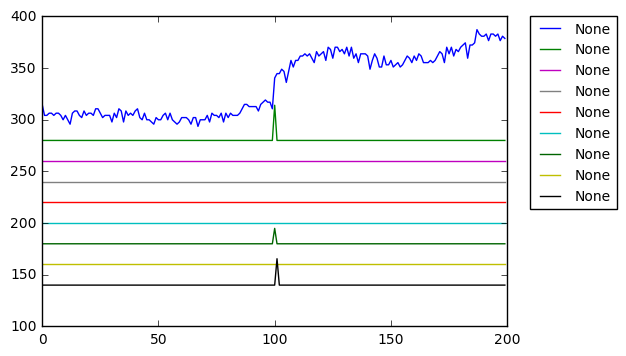

DUP_start id: 5
id: 5


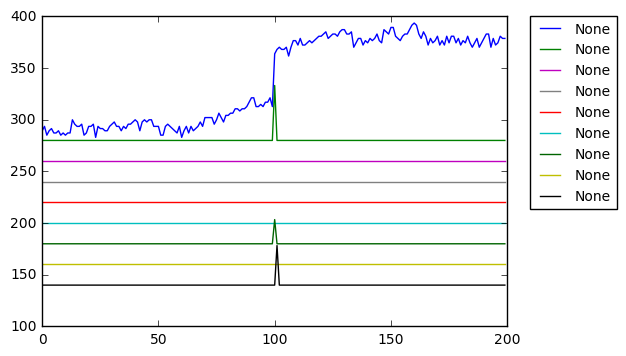

DUP_start id: 10
id: 10


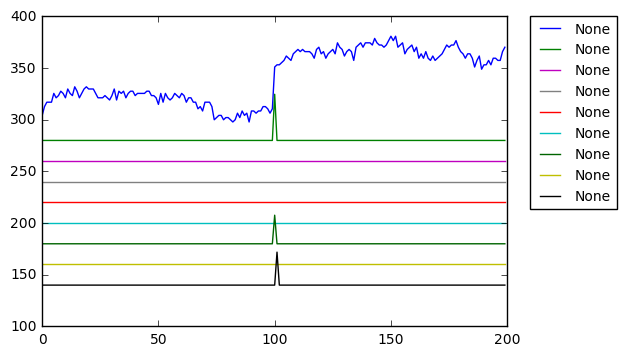

DUP_start id: 15
id: 15


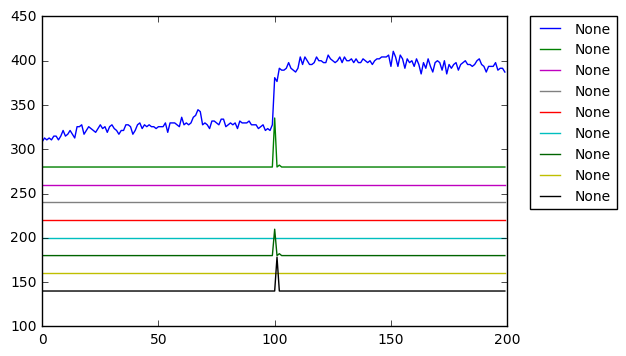

DUP_start id: 20
id: 20


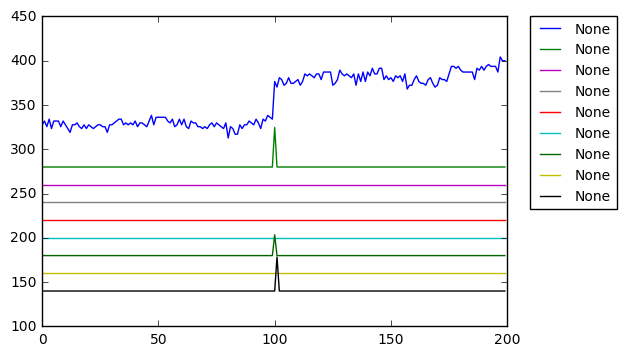

DUP_start id: 25
id: 25


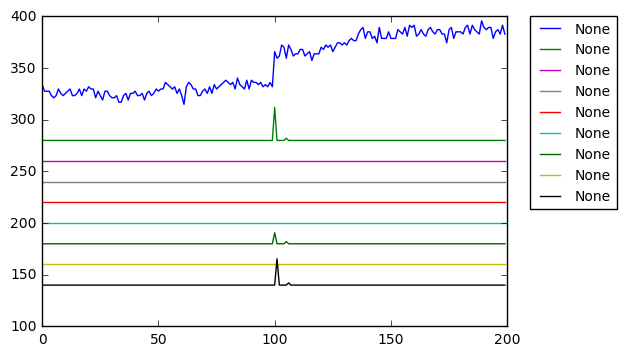

In [40]:
start_window = 0
plot_channels(start_window, n_windows)

DUP_end id: 3000
id: 3000


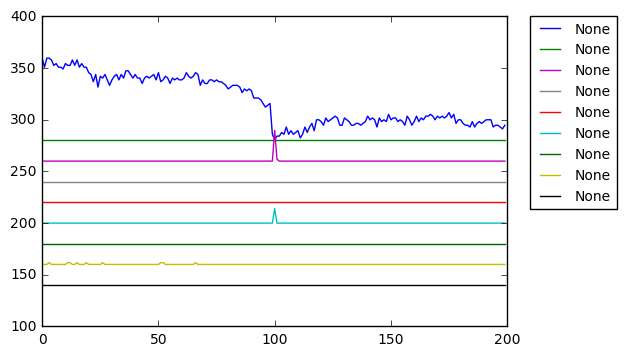

DUP_end id: 3005
id: 3005


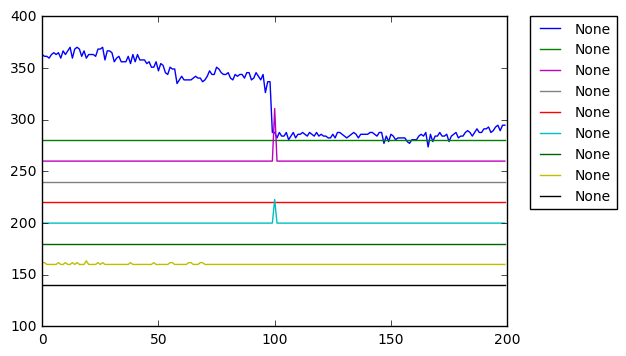

DUP_end id: 3010
id: 3010


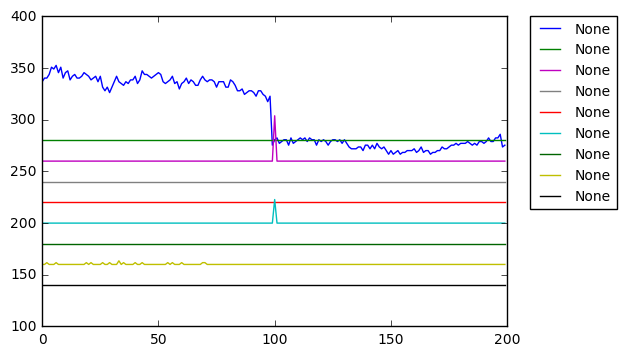

DUP_end id: 3015
id: 3015


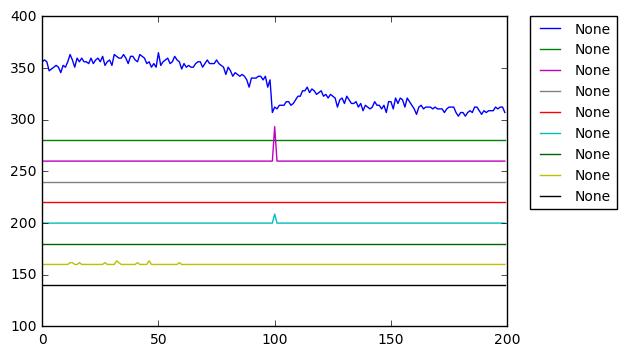

DUP_end id: 3020
id: 3020


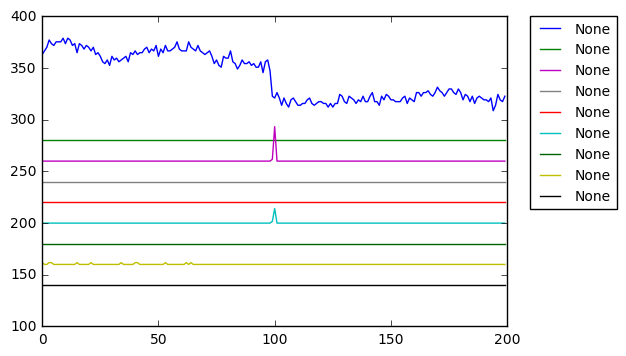

DUP_end id: 3025
id: 3025


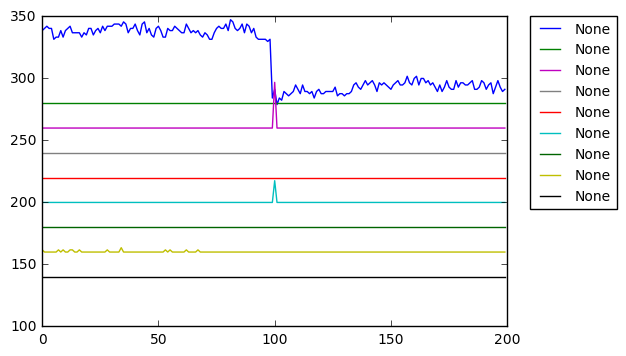

In [278]:
start_window =3000
plot_channels(start_window, n_windows)

INV_start id: 6000
id: 6000


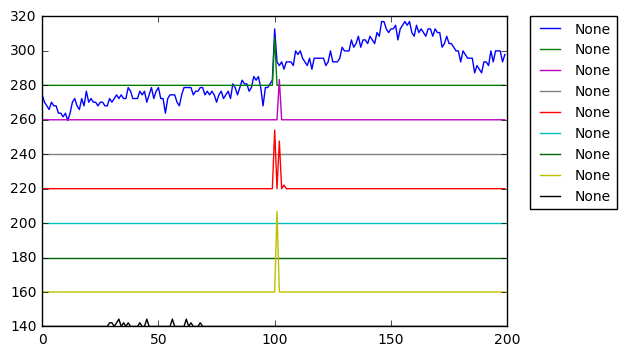

INV_end id: 6005
id: 6005


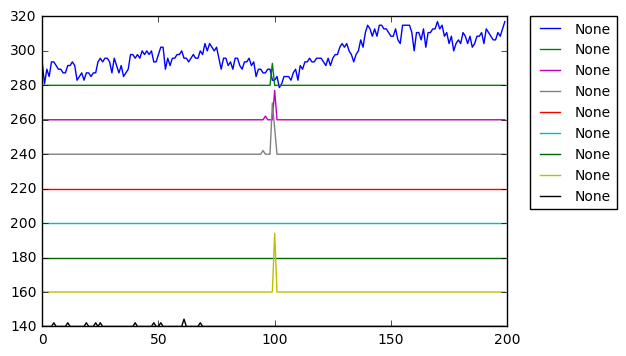

INV_end id: 6010
id: 6010


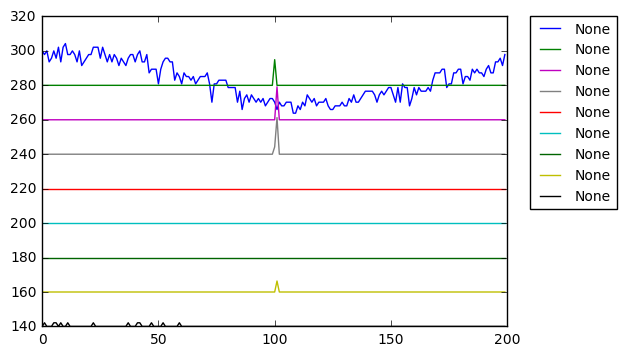

INV_end id: 6015
id: 6015


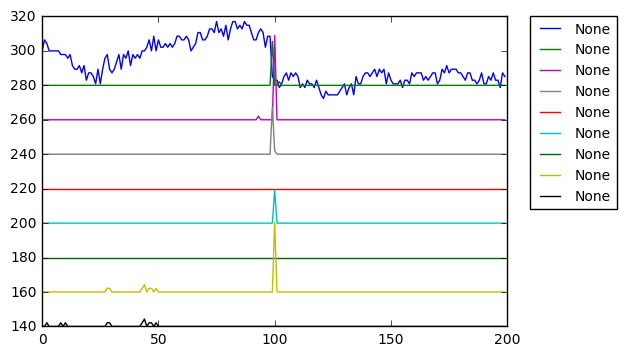

INV_end id: 6020
id: 6020


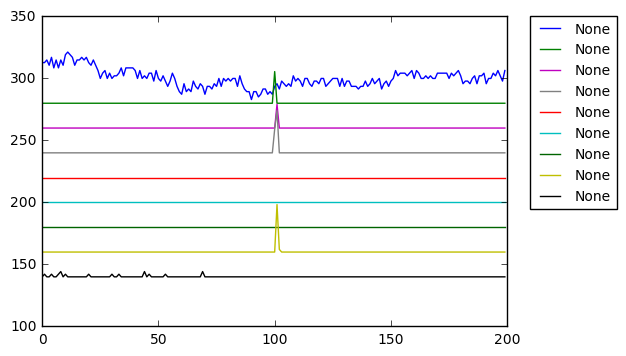

INV_end id: 6025
id: 6025


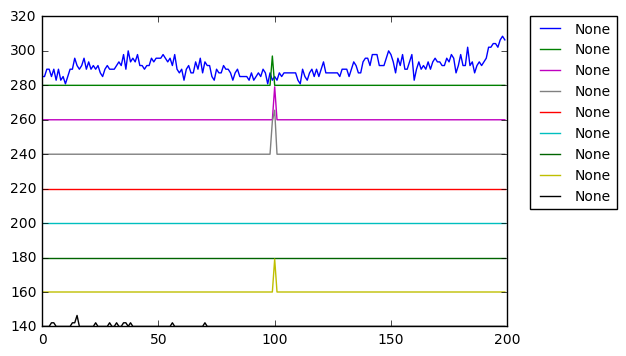

In [41]:
start_window =6000
plot_channels(start_window, n_windows)

   
## Transposes every window in X, to comply to McFly format

In [42]:
def transposelabelsset(X):
    image = []
    for i in range (0, len(X -1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

image1 = transposelabelsset(X_train)
image2 = transposelabelsset(X_val)
image3 = transposelabelsset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

9


## Prepare the labels in McFly format

In [43]:
classlabels = list(set(y_train))
mapclasses = {classlabels[i] : i for i in range(len(classlabels))}
print(mapclasses)

y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')
y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

{'INV_start': 0, 'DUP_end': 4, 'INV_end': 1, 'DUP_start': 2, 'noSV': 3}


In [44]:
y_test_binary

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [45]:
y_val_binary


array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [46]:
X_train.shape

(10000, 200, 9)

## Generate neural networks architectures

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [48]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

In [75]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=2,
                                  cnn_max_layers=2,
                                  cnn_min_filters = 4, 
                                  cnn_max_filters = 4, 
                                  cnn_min_fc_nodes=6, 
                                  cnn_max_fc_nodes=6,
                                  low_lr=2, high_lr=2,
                                  kernel_size = 5)

Wall time: 1.29 s


In [76]:
%%time
for model, params, model_types in models:
    print(params)
    model.summary()

{'learning_rate': 0.01, 'fc_hidden_nodes': 6, 'regularization_rate': 0.00224412682588304, 'kernel_size': 5, 'filters': array([4, 4])}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_25 (Batc (None, 200, 9)            36        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 200, 4)            184       
_________________________________________________________________
batch_normalization_26 (Batc (None, 200, 4)            16        
_________________________________________________________________
activation_25 (Activation)   (None, 200, 4)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 200, 4)            84        
_________________________________________________________________
batch_normalization_27 (Batc (None, 200, 4)            16        
________

## Train the networks

In [65]:
train_set_size = X_train.shape[0]
train_set_size

10000

In [95]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=1, 
                                                                                  subset_size=train_set_size,
                                                                                  verbose=True)

Training model 0 CNN
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 8s 820us/step - loss: 0.1184 - acc: 0.9824 - val_loss: 0.1238 - val_acc: 0.9874
Wall time: 8.2 s


## Plot training process

Currently run with a very low number of epochs

Wall time: 131 ms


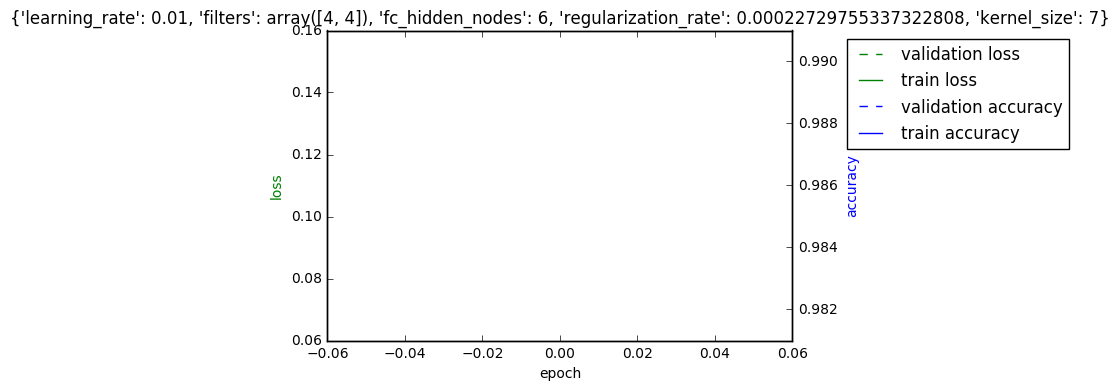

In [292]:
%%time
for i in range(len(models)):
    name = str(models[i][1])
    find_architecture.plotTrainingProcess(histories[i], name)

In [96]:
#%%time
import pandas as pd
results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

,model,train_acc,train_loss,val_acc,val_loss
0,"{'learning_rate': 0.01, 'fc_hidden_nodes': 6, ...",0.9824,0.1184,0.9874,0.12378


## Take the best current model 

In [97]:
best_model_index = np.argmax(val_accuracies)

In [98]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

0 CNN {'learning_rate': 0.01, 'fc_hidden_nodes': 6, 'regularization_rate': 0.00224412682588304, 'kernel_size': 5, 'filters': array([4, 4])}


## Save the best current model

In [99]:
from keras.models import load_model

model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_100518_Dup_inv_nosv_1')

best_model.save(model_path)

## Reload the best current model

In [100]:
import os
from keras.models import load_model
model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_100518_Dup_inv_nosv_1')
model_reloaded = load_model(model_path)

## Inspect model predictions on test labels

In [101]:
model = model_reloaded
labelssize = X_test.shape[0]
probs = model.predict_proba(X_test[:labelssize,:,:],batch_size=1)

## Columns are predicted, rows are truth

In [102]:
dict=mapclasses
dict_sorted = sorted(dict.items(), key=lambda x: x[1])
dict_sorted

[('INV_start', 0),
 ('INV_end', 1),
 ('DUP_start', 2),
 ('noSV', 3),
 ('DUP_end', 4)]

In [103]:
labels = [i[0] for i in dict_sorted]

In [104]:
predicted = probs.argmax(axis=1)
y_index = y_test_binary.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix

,INV_start,INV_end,DUP_start,noSV,DUP_end
INV_start,1808,26,7,1,4
INV_end,63,1767,3,3,10
DUP_start,0,4,1811,3,28
noSV,0,0,0,1846,0
DUP_end,1,1,11,1,1832


## Test best current model on testset

### Overall accuracy on the test set:

In [105]:
%%time
score_test = model_reloaded.evaluate(X_test, y_test_binary, verbose=False)
print('Test loss and accuracy of best model: ' + str(score_test))

Test loss and accuracy of best model: [0.13736780561902281, 0.9820151679306609]
Wall time: 2.92 s


### Re-check the train and validation scores: 

In [106]:
best_model.get_config()[0]

{'class_name': 'BatchNormalization',
 'config': {'axis': -1,
  'batch_input_shape': (None, 200, 9),
  'beta_constraint': None,
  'beta_initializer': {'class_name': 'Zeros', 'config': {}},
  'beta_regularizer': None,
  'center': True,
  'dtype': 'float32',
  'epsilon': 0.001,
  'gamma_constraint': None,
  'gamma_initializer': {'class_name': 'Ones', 'config': {}},
  'gamma_regularizer': None,
  'momentum': 0.99,
  'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}},
  'moving_variance_initializer': {'class_name': 'Ones', 'config': {}},
  'name': 'batch_normalization_25',
  'scale': True,
  'trainable': True}}

In [107]:
score_train = model_reloaded.evaluate(X_train, y_train_binary, verbose=False)
print('Train Score of best model: ' + str(score_train))

Train Score of best model: [0.11955631347894669, 0.98540000000000005]


In [108]:
score_val = model_reloaded.evaluate(X_val, y_val_binary, verbose=False)
print('Val Score of best model: ' + str(score_val))

Val Score of best model: [0.12377992113828659, 0.98740000000000006]
